In [1]:
#import sys
#!{sys.executable} -m pip install pmdarima
#!{sys.executable} -m pip install typing_extensions

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.stats.stattools import jarque_bera
import matplotlib.pyplot as plt
%matplotlib inline

from pmdarima.arima import auto_arima

/Users/m04m_br/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
In /Users/m04m_br/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/m04m_br/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/m04m_br/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/m04m_br/anaconda3/lib/python3.7/site-package

In [3]:
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=25,6

In [4]:
dateparse= lambda dates:pd.datetime.strptime(dates,'%d/%m/%Y')

In [5]:
data=pd.read_csv('revenue.csv',parse_dates=['DATE'],index_col='DATE',date_parser=dateparse)

/Users/m04m_br/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [6]:
#data.head(25)

In [7]:
#data.shape

In [8]:
data.describe()

,VALUE
count,19.000000
mean,299221.789474
std,32881.859789
min,231268.000000
25%,276976.500000
50%,303493.000000
75%,318024.500000
max,377989.000000


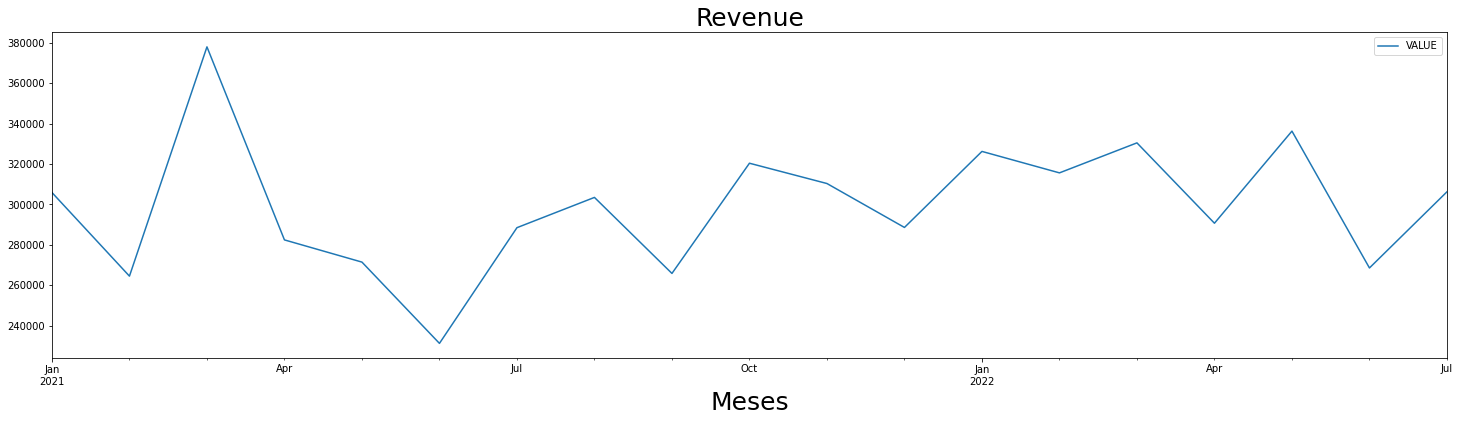

In [9]:
data.plot()
plt.xlabel('Meses',size=25)
plt.ylabel('')
plt.title('Revenue',size=25)
plt.show()

In [10]:
stepwise=auto_arima(data,start_p=1,start_q=1,max_p=10,max_q=10,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,
                    error_action='ignore',suppress_warnings=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=149.413, Time=0.07 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=151.647, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=inf, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.06 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=155.508, Time=0.05 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=147.355, Time=0.09 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=145.360, Time=0.08 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=147.355, Time=0.16 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=149.355, Time=0.30 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=145.342, Time=0.08 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=157.718, Time=0.02 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=147.342, Time=0.23 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=147.342, Time=0.17 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=149.342, Time=0.39 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AI

In [11]:
stepwise

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [12]:
stepwise.aic()

145.34179954016244

In [13]:
stepwise1=auto_arima(data,start_p=1,start_q=1,max_p=10,max_q=10,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,
                    error_action='ignore',suppress_warnings=True,stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=151.647, Time=0.02 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=148.245, Time=0.05 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=149.264, Time=0.08 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=148.084, Time=0.02 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=149.507, Time=0.03 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=151.054, Time=0.08 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=150.084, Time=0.04 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=151.507, Time=0.08 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=153.054, Time=0.09 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=157.718, Time=0.01 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.04 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=148.529, Time=0.08 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=145.342, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=147.342, Time=0.10 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=149.342, Time=0.18 sec
 ARIMA(0,1,1)(

In [14]:
stepwise1

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [15]:
stepwise1.aic()

145.34179954016244

In [16]:
#previsores = base2.iloc[:, 3:11].values
#classe = base2.iloc[:, 2].values

train=data.iloc[0:15,:]
test=data.iloc[15:,:]

#train.head(14)


In [17]:
#test.head(10)

In [18]:
stepwise.fit(train)
stepwise1.fit(train)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [19]:
future_forecast=stepwise.predict(n_periods=4)
future_forecast1=stepwise1.predict(n_periods=4)

In [20]:

future_forecast=pd.DataFrame(future_forecast,index=test.index, columns=['previsão modelo 1'])
future_forecast1=pd.DataFrame(future_forecast1,index=test.index, columns=['previsão modelo 2'])

In [21]:
#future_forecast.head(10)

In [22]:
#future_forecast1.head(10)

<Figure size 1800x360 with 0 Axes>

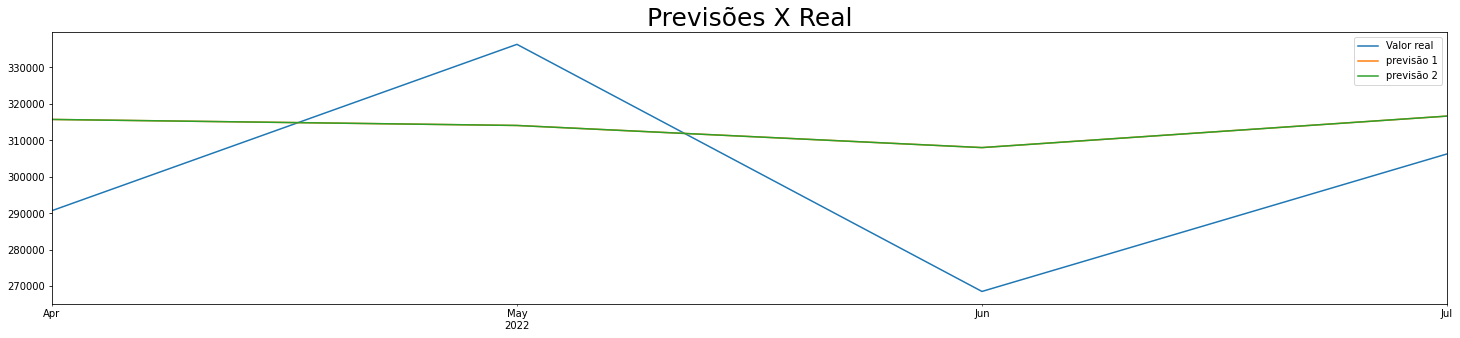

In [23]:
plt.figure(figsize=(25,5))
pd.concat([test,future_forecast,future_forecast1],axis=1).plot(figsize=(25,5))
plt.xlabel('')
plt.title('Previsões X Real',size=25)
plt.legend(['Valor real','previsão 1','previsão 2'])
plt.show();

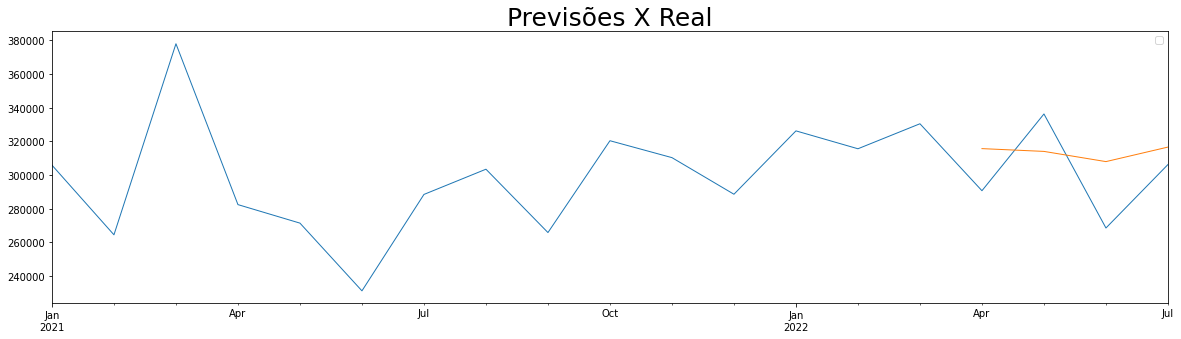

In [24]:
pd.concat([data,future_forecast],axis=1).plot(linewidth=1,figsize=(20,5))
plt.legend('')
plt.xlabel('')
plt.title('Previsões X Real',size=25)
plt.show();

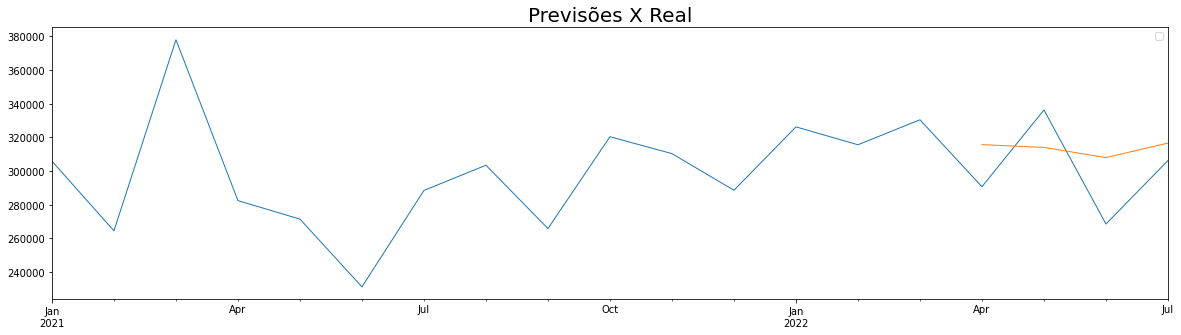

In [25]:
pd.concat([data,future_forecast1],axis=1).plot(linewidth=1, figsize=(20,5))
plt.legend('')
plt.xlabel('')
plt.title('Previsões X Real',size=20)
plt.show();

In [26]:
stepwise.summary()

/Users/m04m_br/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1330: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  " calculate test statistic." % i
/Users/m04m_br/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1342: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  " calculate test statistic." % i


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   15
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                 -23.589
Date:                             Mon, 29 Aug 2022   AIC                             53.178
Time:                                     16:48:27   BIC                             49.258
Sample:                                          0   HQIC                            44.979
                                              - 15                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2034   2.81e+04   7.24e-06      1.000   -5.51e+04    5.51e+04
ar.S.L12      -0.8494    468.951     -0.002      0.999    -919.977     918.278
sigma2      2.789e+09      0.200    1.4e+10      0.000    2.79e+09    2.79e+09
===================================================================================
Ljung-Box (L1) (Q):                   2.00   Jarque-Bera (JB):                 0.33
Prob(Q):                              0.16   Prob(JB):                         0.85
Heteroskedasticity (H):                nan   Skew:                             0.00
Prob(H) (two-sided):                   nan   Kurtosis:                         1.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.26e+26. Standard errors may be unstable.
"""

In [27]:
stepwise1.summary()

/Users/m04m_br/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1330: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  " calculate test statistic." % i
/Users/m04m_br/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1342: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  " calculate test statistic." % i


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   15
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                 -23.589
Date:                             Mon, 29 Aug 2022   AIC                             53.178
Time:                                     16:48:27   BIC                             49.258
Sample:                                          0   HQIC                            44.979
                                              - 15                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2034   2.81e+04   7.24e-06      1.000   -5.51e+04    5.51e+04
ar.S.L12      -0.8494    468.951     -0.002      0.999    -919.977     918.278
sigma2      2.789e+09      0.200    1.4e+10      0.000    2.79e+09    2.79e+09
===================================================================================
Ljung-Box (L1) (Q):                   2.00   Jarque-Bera (JB):                 0.33
Prob(Q):                              0.16   Prob(JB):                         0.85
Heteroskedasticity (H):                nan   Skew:                             0.00
Prob(H) (two-sided):                   nan   Kurtosis:                         1.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.26e+26. Standard errors may be unstable.
"""

In [28]:
print("RMSE do modelo 1: %.3f" % np.sqrt(mean_squared_error(test, future_forecast)))
print('')
print("RMSE do modelo 2: %.3f" % np.sqrt(mean_squared_error(test, future_forecast1)))

RMSE do modelo 1: 26365.302

RMSE do modelo 2: 26365.302


In [29]:
erros=pd.DataFrame(np.array(future_forecast.values.tolist())-np.array(test.values.tolist()))

erros1=pd.DataFrame(np.array(future_forecast1.values.tolist())-np.array(test.values.tolist()))

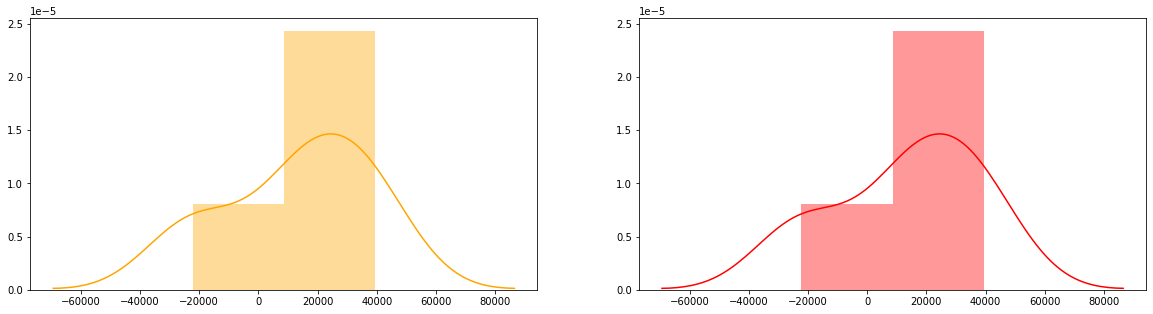

In [30]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(erros,ax=ax[0], color='orange')
sns.distplot(erros1,ax=ax[1], color='red');

In [31]:
stepwise.fit(data)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [32]:
future_forecast2=stepwise.predict(n_periods=10)

In [33]:

future_forecast2=pd.DataFrame(future_forecast2, 
                              index=pd.date_range(start='2022-07-01',
                                                  end='2023-04-01', freq='MS'),columns=['nova previsão'])

<Figure size 1440x360 with 0 Axes>

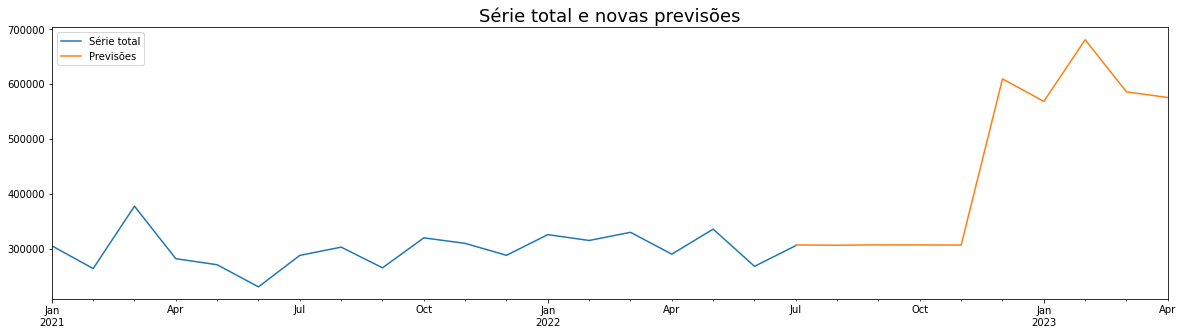

In [34]:
plt.figure(figsize=(20,5))
pd.concat([data,future_forecast2],axis=1).plot(figsize=(20,5))
plt.xlabel('')
plt.title('Série total e novas previsões',size=18)
plt.legend(['Série total','Previsões'])
plt.show();

In [35]:
##Teste Jarque Bera

test = jarque_bera(erros)
print('Estatística Jarque-Bera :', test[0])
print('p-valor :', test[1])
print('Assimetria :', test[2])
print('Curtose :',test[3])

Estatística Jarque-Bera : [0.38060199]
p-valor : [0.82671026]
Assimetria : [-0.51174084]
Curtose : [1.88820091]


In [36]:
test1 = jarque_bera(erros1)
print('Estatística Jarque-Bera :', test1[0])
print('p-valor :', test1[1])
print('Assimetria :', test1[2])
print('Curtose :',test1[3])

Estatística Jarque-Bera : [0.38060199]
p-valor : [0.82671026]
Assimetria : [-0.51174084]
Curtose : [1.88820091]
